代码来自文章[AutoTS 简洁实现](https://zhuanlan.zhihu.com/p/612771866)

> 我们在这里使用"daily-min-temperatures" 数据集，这个数据集记录了从1981到1990年之间每天的温度数据：

## 准备数据

In [1]:
import pandas as pd
from autots import AutoTS

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True)

In [2]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


## 模型设置

In [3]:
model = AutoTS(
    forecast_length=30,
    frequency='D',
    prediction_interval=0.9,
    ensemble='superensemble', # auto
    max_generations=4,
    num_validations=2,
    validation_method='backwards',
    model_list='superfast',
    transformer_list='superfast',
)

model.fit(df)

Data frequency is: D, used frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 4
Model Number: 2 with model AverageValueNaive in generation 0 of 4
Model Number: 3 with model AverageValueNaive in generation 0 of 4
Model Number: 4 with model GLS in generation 0 of 4
Model Number: 5 with model GLS in generation 0 of 4
Model Number: 6 with model LastValueNaive in generation 0 of 4
Model Number: 7 with model LastValueNaive in generation 0 of 4
Model Number: 8 with model LastValueNaive in generation 0 of 4
Model Number: 9 with model LastValueNaive in generation 0 of 4
Model Number: 10 with model SeasonalNaive in generation 0 of 4
Model Number: 11 with model SeasonalNaive in generation 0 of 4
Model Number: 12 with model SeasonalNaive in generation 0 of 4
Model Number: 13 with model ConstantNaive in generation 0 of 4
Model Number: 14 with model SeasonalNaive in generation 0 of 4
Model Number: 15 with model SeasonalNaive in generation 0 of 4
Model Number: 16 with mod

c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).bfill()


Model Number: 34 with model SeasonalityMotif in generation 0 of 4
Model Number: 35 with model AverageValueNaive in generation 0 of 4
Model Number: 36 with model SeasonalNaive in generation 0 of 4
Model Number: 37 with model AverageValueNaive in generation 0 of 4
Model Number: 38 with model SeasonalNaive in generation 0 of 4
Model Number: 39 with model SeasonalityMotif in generation 0 of 4
Model Number: 40 with model ConstantNaive in generation 0 of 4
Model Number: 41 with model ConstantNaive in generation 0 of 4
Model Number: 42 with model GLS in generation 0 of 4
Model Number: 43 with model ConstantNaive in generation 0 of 4
Model Number: 44 with model AverageValueNaive in generation 0 of 4
Model Number: 45 with model SeasonalNaive in generation 0 of 4
Model Number: 46 with model SeasonalNaive in generation 0 of 4
New Generation: 1 of 4
Model Number: 47 with model SeasonalNaive in generation 1 of 4
Model Number: 48 with model AverageValueNaive in generation 1 of 4
Model Number: 49 wit

c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).bfill()


Model Number: 87 with model SeasonalityMotif in generation 2 of 4
Model Number: 88 with model AverageValueNaive in generation 2 of 4
Model Number: 89 with model GLS in generation 2 of 4
Model Number: 90 with model SeasonalNaive in generation 2 of 4
Model Number: 91 with model SeasonalityMotif in generation 2 of 4
Model Number: 92 with model SeasonalNaive in generation 2 of 4
Model Number: 93 with model GLS in generation 2 of 4
Model Number: 94 with model AverageValueNaive in generation 2 of 4
Model Number: 95 with model AverageValueNaive in generation 2 of 4
Model Number: 96 with model SeasonalityMotif in generation 2 of 4
Model Number: 97 with model SeasonalNaive in generation 2 of 4
Model Number: 98 with model AverageValueNaive in generation 2 of 4
Model Number: 99 with model GLS in generation 2 of 4
Model Number: 100 with model SeasonalityMotif in generation 2 of 4
Model Number: 101 with model SeasonalityMotif in generation 2 of 4
Model Number: 102 with model LastValueNaive in gener

Initiated AutoTS object with best model: 
AverageValueNaive
{'fillna': 'ffill', 'transformations': {'0': 'AlignLastValue', '1': 'RobustScaler', '2': 'ClipOutliers', '3': 'ClipOutliers'}, 'transformation_params': {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {}, '2': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '3': {'method': 'clip', 'std_threshold': 3, 'fillna': None}}}
{'method': 'Weighted_Mean', 'window': None}
Validation: 0, 1, 2
SMAPE: 13.8397304209707, 15.928862010883744, 23.359835646968516
MAE: 2.01, 2.0000000000000004, 2.6166666666666663
SPL: 0.4552158960641956, 0.43860759493670887, 0.5275204359673021

## 查看模型预测结果

In [22]:
# 查看预测结果
preds = model.predict()
preds.forecast.head()

,Temp
1991-01-01,12.9
1991-01-02,12.9
1991-01-03,12.9
1991-01-04,12.9
1991-01-05,12.9


<Axes: title={'center': 'Temp with model AverageValueNaive'}>

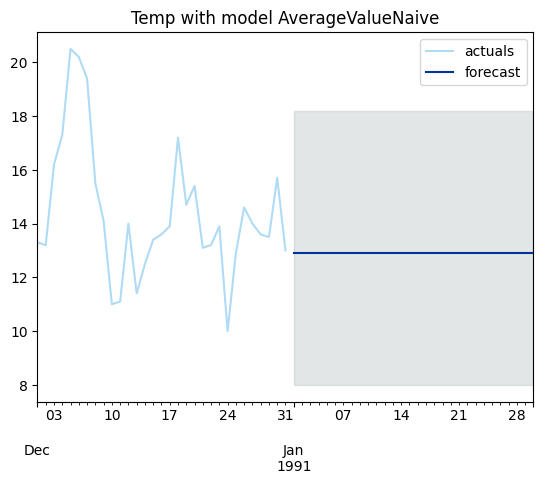

In [20]:
# plot a sample
preds.plot(model.df_wide_numeric,
           series=model.df_wide_numeric.columns[0],
           start_date="1990-12-01")

## 查看模型结果

In [16]:
# Print the details of the best model
# ? 最好模型评定逻辑？
print(model.best_model) # print(model) etc.

                                   ID              Model  \
123  c1324f6f63f79201cb09d09bb955c54e  AverageValueNaive   

                                 ModelParameters  \
123  {"method": "Weighted_Mean", "window": null}   

                              TransformationParameters  Ensemble  
123  {"fillna": "ffill", "transformations": {"0": "...         0  


In [19]:
model_results_df = model.results()
model_results_df[model_results_df['ID']=='c1324f6f63f79201cb09d09bb955c54e']

,ID,Model,ModelParameters,TransformationParameters,TransformationRuntime,FitRuntime,PredictRuntime,TotalRuntime,Ensemble,Exceptions,...,oda_weighted,dwae_weighted,mqae_weighted,ewmae_weighted,uwmse_weighted,smoothness_weighted,wasserstein_weighted,dwd_weighted,TotalRuntimeSeconds,Score
153,c1324f6f63f79201cb09d09bb955c54e,AverageValueNaive,"{""method"": ""Weighted_Mean"", ""window"": null}","{""fillna"": ""ffill"", ""transformations"": {""0"": ""...",0 days 00:00:00.017957,0 days,0 days 00:00:00.000988,0 days 00:00:00.024899,0,NaN,...,0.333333,2.055412,1.228,5.733933,3.109717,0.010292,11.360222,9.660413,0.0249,17.542036
188,c1324f6f63f79201cb09d09bb955c54e,AverageValueNaive,"{""method"": ""Weighted_Mean"", ""window"": null}","{""fillna"": ""ffill"", ""transformations"": {""0"": ""...",0 days 00:00:00.023902,0 days,0 days 00:00:00.001995,0 days 00:00:00.036901,0,NaN,...,0.900000,1.609474,1.396,7.054604,3.619975,0.069912,4.039367,14.380759,0.0369,18.179020
213,c1324f6f63f79201cb09d09bb955c54e,AverageValueNaive,"{""method"": ""Weighted_Mean"", ""window"": null}","{""fillna"": ""ffill"", ""transformations"": {""0"": ""...",0 days 00:00:00.019949,0 days,0 days 00:00:00.000996,0 days 00:00:00.027924,0,NaN,...,0.366667,2.456313,1.928,13.680589,7.566172,0.023851,5.855177,16.348638,0.0279,23.604486


In [18]:
# 查看模型结果
print(model.results().shape)
model.results().sort_values(by="Score", ascending=False).head()

(216, 60)


,ID,Model,ModelParameters,TransformationParameters,TransformationRuntime,FitRuntime,PredictRuntime,TotalRuntime,Ensemble,Exceptions,...,oda_weighted,dwae_weighted,mqae_weighted,ewmae_weighted,uwmse_weighted,smoothness_weighted,wasserstein_weighted,dwd_weighted,TotalRuntimeSeconds,Score
75,2bdd614fbb85cd22e8683a4f27fb6bf6,GLS,{},"{""fillna"": ""pchip"", ""transformations"": {""0"": ""...",0 days 00:00:00.014958,0 days 00:00:00.001996,0 days 00:00:00.067820,0 days 00:00:00.089760,0,NaN,...,0.400000,1.948967,1.625739,8.108989,3.447718,0.087394,12.436204,9.296666,0.0898,311267.056207
154,efa204c1bfd04a844ee4229b1f066b10,SeasonalNaive,"{""method"": ""lastvalue"", ""lag_1"": 2, ""lag_2"": 1}","{""fillna"": ""rolling_mean"", ""transformations"": ...",0 days 00:00:00.011969,0 days 00:00:00,0 days 00:00:00.069812,0 days 00:00:00.086768,0,NaN,...,0.666667,82.385815,162.355923,1043.252426,28353.121161,0.868546,776.888941,64.030007,0.0868,1020.761414
156,f7c5c94e24c643c45dd0e2c1b96a055f,GLS,{},"{""fillna"": ""rolling_mean"", ""transformations"": ...",0 days 00:00:00.026928,0 days 00:00:00.001994,0 days 00:00:00.068816,0 days 00:00:00.102726,0,NaN,...,0.433333,4.781605,4.306405,16.336717,70.682918,0.365510,47.107573,3.316859,0.1027,903.246900
30,e78ae1f747ce4f2163b5837ed0388ff7,ConstantNaive,"{""constant"": -1}","{""fillna"": ""ffill"", ""transformations"": {""0"": ""...",0 days 00:00:00.021941,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00.026928,0,NaN,...,0.333333,24.853902,36.787596,229.895192,1360.519918,0.000000,180.856760,6.286356,0.0269,333.063493
33,188df9cdd57284c3d16962cfdd76da5c,SeasonalityMotif,"{""window"": 7, ""point_method"": ""closest"", ""dist...","{""fillna"": ""mean"", ""transformations"": {""0"": ""D...",0 days 00:00:00.033876,0 days 00:00:00,0 days 00:00:00.032946,0 days 00:00:00.072806,0,NaN,...,0.666667,17.524700,45.005131,185.399349,1569.287769,1.873881,264.368245,20.543328,0.0728,317.407261


In [14]:
# 查看模型在验证集的结果？
print(model.results("validation").shape)
model.results("validation").sort_values(by="Score", ascending=False).head()

(165, 54)


,ID,Model,ModelParameters,TransformationParameters,Ensemble,Runs,smape,mae,rmse,made,...,wasserstein_weighted,dwd_weighted,containment_weighted,contour_weighted,TotalRuntimeSeconds,Score,lowest_series_mape,lowest_series_mape_name,highest_series_mape,highest_series_mape_name
32,2bdd614fbb85cd22e8683a4f27fb6bf6,GLS,{},"{""fillna"": ""pchip"", ""transformations"": {""0"": ""...",0,1,16.408797,2.330680,2.975429,0.605463,...,12.436204,9.296666,1.000000,0.666667,0.0898,311267.056207,20.851063,Temp,20.851063,Temp
145,efa204c1bfd04a844ee4229b1f066b10,SeasonalNaive,"{""method"": ""lastvalue"", ""lag_1"": 2, ""lag_2"": 1}","{""fillna"": ""rolling_mean"", ""transformations"": ...",0,1,160.633781,193.979120,223.062316,4.773441,...,776.888941,64.030007,0.000000,0.533333,0.0868,1020.761414,1735.403461,Temp,1735.403461,Temp
157,f7c5c94e24c643c45dd0e2c1b96a055f,GLS,{},"{""fillna"": ""rolling_mean"", ""transformations"": ...",0,1,58.062180,6.225337,8.033373,0.790879,...,47.107573,3.316859,0.966667,0.566667,0.1027,903.246900,55.693991,Temp,55.693991,Temp
140,e78ae1f747ce4f2163b5837ed0388ff7,ConstantNaive,"{""constant"": -1}","{""fillna"": ""ffill"", ""transformations"": {""0"": ""...",0,1,185.332194,43.544237,49.179867,1.099768,...,180.856760,6.286356,0.000000,0.466667,0.0269,333.063493,389.561615,Temp,389.561615,Temp
15,188df9cdd57284c3d16962cfdd76da5c,SeasonalityMotif,"{""window"": 7, ""point_method"": ""closest"", ""dist...","{""fillna"": ""mean"", ""transformations"": {""0"": ""D...",0,1,123.171286,45.946851,46.085972,1.752807,...,264.368245,20.543328,0.000000,0.400000,0.0728,317.407261,411.056220,Temp,411.056220,Temp
